In [83]:
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

In [84]:
# 한글폰트 설정
sns.set(font='NanumBarunGothic')


In [85]:
df = pd.read_csv('vgames2.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [87]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

## EDA

#### 1. 결측치 처리
- 게임명이 동일할 경우, 플랫폼은 달라도 출시연도 동일함을 확인
- 게임명 동일한 값으로 대체 
  
가. Year : 271개 중 97개 대체,  174개 제거   
나. Genre : 50개 중 15개 대체, 35개 제거   
다. Publisher : 분석에 사용하지 않을 feature → 데이터 전처리 후 열만 삭제

In [88]:
# 이름 중복행 수
print(df.duplicated('Name').sum())

# 이름 중복행 확인
dpl = df[df.duplicated('Name')==True]
dpl = dpl.sort_values(['Name'], ascending=True)
dpl

5105


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6840,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.2
8868,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0,0
16281,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14
9466,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0,0.01
5505,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.3,0.29,0.01M,0.07
...,...,...,...,...,...,...,...,...,...
5298,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0,0.05,0,0.01
5797,pro evolution soccer 2011,PS3,2010.0,Sports,Konami Digital Entertainment,0.29,1.18,0.54,0.41
13758,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.1,0.03,0.02
16252,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11


In [89]:
dpl.groupby(['Name','Platform'], as_index=False)['Year'].value_counts()

,Name,Platform,Year,count
0,007: Quantum of Solace,DS,2008.0,1
1,007: Quantum of Solace,PC,2008.0,1
2,007: Quantum of Solace,PS3,2008.0,1
3,007: Quantum of Solace,Wii,2008.0,1
4,007: Quantum of Solace,X360,2008.0,1
...,...,...,...,...
5006,pro evolution soccer 2011,PS2,2010.0,1
5007,pro evolution soccer 2011,PS3,2010.0,1
5008,pro evolution soccer 2011,PSP,2010.0,1
5009,pro evolution soccer 2011,Wii,2010.0,1


- 각 게임은 여러 종류의 플랫폼에서 출시
- 동일한 게임면은 동일한 해에 출시 → 발행연도 결측치는 게임명으로 검색 후 결측치 대체

In [90]:
df = df.sort_values(by=['Name'], ascending=True).reset_index(drop=True)
df # Name 기준으로 정렬(Year 결측치 대체하기 위해)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.1,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.17,0
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.16,0
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,0.17,0
...,...,...,...,...,...,...,...,...,...
16593,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0,0.2
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0,0
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0,0.02
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0,0.41


2. 지역별 sales 항목 자료형 변환 필요  
3.  year : int형 변환 필요  

In [91]:
# Year 결측치 대체

# i번째 게임명이 i-1번째 게임명과 일치할 경우 same 표시
name_dpl = ['none'] # 인덱스가 0인 게임은 비교대상 없으니 none으로 넣어줌
for n in range(1,16598):
    if df.Name[n] == df.Name[n-1]:
        name_dpl.append('same')
    else:
        name_dpl.append('diff')


In [92]:
df1 = df.copy()

In [93]:
df1['name_dpl'] = name_dpl
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,name_dpl
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.1,0.12,0.03,none
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.17,0,diff
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0,0.03,diff
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.16,0,diff
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,0.17,0,diff
...,...,...,...,...,...,...,...,...,...,...
16593,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0,0.2,diff
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0,0,diff
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0,0.02,same
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0,0.41,diff


In [94]:
year_null = df1[df1.Year.isnull()]
year_null.shape

(271, 10)

In [95]:
a = year_null.query("name_dpl=='same'")
print(a.shape)
a.head()

(97, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,name_dpl
147,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0,0,0.01,0,same
384,All-Star Baseball 2005,XB,NaN,Sports,Unknown,0.11,0.03,0,0.01,same
803,Backbreaker,PS3,NaN,Sports,Unknown,0.16,0,0,0.01,same
1029,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0,0.02,0,0.01,same
1111,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01,same


In [96]:
# Year 결측치 대체
# Year의 결측치 중 name_dpl이 same이면 동일한 게임명의 year 값으로 대체

for i in range(len(a)):
    a.Year.iloc[i] = df1.Year.iloc[i-1]

df1.iloc[a.index] = a 

C:\Users\MSI\AppData\Local\Temp\ipykernel_29732\1253737107.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df1.isnull().sum()

Name             0
Platform         0
Year           174
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
name_dpl         0
dtype: int64

In [98]:
# Year 대체 안 된 결측치 제거
df1 = df1.dropna(subset=['Year'])
df1.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
name_dpl        0
dtype: int64

In [99]:
df1.shape

(16424, 10)

2. Genre

In [100]:
df2 = df1.copy().reset_index(drop=True)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,name_dpl
0,'98 Koshien,PS,1998.0,Sports,Magical Company,0.15,0.1,0.12,0.03,none
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.17,0,diff
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0,0.03,diff
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,0.16,0,diff
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,0.17,0,diff
...,...,...,...,...,...,...,...,...,...,...
16419,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,0.01,0,0,0,diff
16420,uDraw Studio,Wii,2010.0,Misc,THQ,1.67,0.58,0,0.2,diff
16421,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0,0,diff
16422,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,0.08,0.09,0,0.02,same


In [101]:
genre_null = df2[df2.Genre.isnull()]

In [102]:
b = genre_null.query("name_dpl=='same'")
print(b.shape)
b.head()

(15, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,name_dpl
787,Back to the Future: The Game,XOne,2015.0,NaN,Telltale Games,0,0.02,0,0,same
1910,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01,same
2185,Cloudy With a Chance of Meatballs,PS3,2009.0,NaN,Ubisoft,0.09,0.01,0,0.01,same
3473,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.1,0.01,0.04,same
5195,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,0.01,0.79,0,0.08,same


In [103]:
# Genre 결측치 대체
# Genre의 결측치 중 name_dpl이 same이면 동일한 게임명의 Genre 값으로 대체

for i in range(len(b)):
    b.Genre.iloc[i] = df2.Genre.iloc[i-1]

df2.iloc[b.index] = b 

C:\Users\MSI\AppData\Local\Temp\ipykernel_29732\3459811889.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
df2.isnull().sum()

Name            0
Platform        0
Year            0
Genre          35
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
name_dpl        0
dtype: int64

In [105]:
# Genre 대체 안 된 결측치 제거
df2 = df2.dropna(subset=['Genre'])
df2.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
name_dpl        0
dtype: int64

## Data Wrangling

In [106]:
df3 = df2.copy().reset_index(drop=True)


In [107]:
df3.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      39
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
name_dpl        0
dtype: int64

1. 이상치 처리   
    가. Year : 1900 이하인 값 처리   
    - 20 이하면 +2000, 20 초과 100 이하면 +1900   

    나. sales 단위 통합 : million 기준
2. 데이터 형변환

In [108]:
# year 이상치 수정
df3.Year.min()

0.0

In [109]:
# 날짜 이상치 수정 함수 설정
def year_clean(list):
    result = []
    for val in list:
        if val <= 20:
            val = val+2000
            result.append(val)
        elif (val > 20) and (val < 100):
            val = val+1900
            result.append(val)
        else :
            result.append(val)
    return result

# 함수 적용
df3.Year = year_clean(df3.Year)

In [110]:
df3['NA_Sales'] = df3['NA_Sales'].str.replace('M','')
df3['EU_Sales'] = df3['EU_Sales'].str.replace('M','')
df3['JP_Sales'] = df3['JP_Sales'].str.replace('M','')
df3['Other_Sales'] = df3['Other_Sales'].str.replace('M','')

In [111]:
na = df3[df3['NA_Sales'].str.contains('K')] # na_sales 중 k 있는 행 추출
na_k = round(na['NA_Sales'].str.replace('K','').astype(float)/1000,2) # 단위 변환
df3.iloc[na_k.index,5] = na_k # 원래 데이터 프레임에 값 넣기

eu = df3[df3['EU_Sales'].str.contains('K')] 
eu_k = round(eu['EU_Sales'].str.replace('K','').astype(float)/1000,2) 
df3.iloc[eu_k.index,6] = eu_k

jp = df3[df3['JP_Sales'].str.contains('K')] 
jp_k = round(jp['JP_Sales'].str.replace('K','').astype(float)/1000,2) 
df3.iloc[jp_k.index,7] = jp_k

ot = df3[df3['Other_Sales'].str.contains('K')] 
ot_k = round(ot['Other_Sales'].str.replace('K','').astype(float)/1000,2) 
df3.iloc[ot_k.index,8] = ot_k

In [112]:
# 데이터 형변환
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16389 entries, 0 to 16388
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16389 non-null  object 
 1   Platform     16389 non-null  object 
 2   Year         16389 non-null  float64
 3   Genre        16389 non-null  object 
 4   Publisher    16350 non-null  object 
 5   NA_Sales     16389 non-null  object 
 6   EU_Sales     16389 non-null  object 
 7   JP_Sales     16389 non-null  object 
 8   Other_Sales  16389 non-null  object 
 9   name_dpl     16389 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [113]:
df3['Year'] = df3['Year'].astype(int)
df3['NA_Sales'] = df3['NA_Sales'].astype(float)
df3['EU_Sales'] = df3['EU_Sales'].astype(float)
df3['JP_Sales'] = df3['JP_Sales'].astype(float)
df3['Other_Sales'] = df3['Other_Sales'].astype(float)

In [114]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16389 entries, 0 to 16388
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16389 non-null  object 
 1   Platform     16389 non-null  object 
 2   Year         16389 non-null  int32  
 3   Genre        16389 non-null  object 
 4   Publisher    16350 non-null  object 
 5   NA_Sales     16389 non-null  float64
 6   EU_Sales     16389 non-null  float64
 7   JP_Sales     16389 non-null  float64
 8   Other_Sales  16389 non-null  float64
 9   name_dpl     16389 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 1.2+ MB


In [115]:
df3 = df3.drop(columns='name_dpl')
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
16384,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00
16385,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20
16386,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00
16387,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02


In [116]:
df3.shape

(16389, 9)

In [117]:
df3.Platform.unique()

array(['PS', 'PS2', 'PSP', 'PS3', 'X360', 'PC', 'DS', 'Wii', 'N64', '3DS',
       'GC', 'XB', 'NES', 'GBA', 'PSV', 'PS4', 'XOne', 'SNES', '2600',
       'WiiU', 'SAT', 'GB', 'NG', 'GEN', 'PCFX', 'DC', '3DO', 'WS',
       'TG16', 'SCD', 'GG'], dtype=object)

In [118]:
# 데이터 수 적은 2017년, 2020년 제외
df3 = df3.drop(df3[df3['Year']==2017].index)
df3 = df3.drop(df3[df3['Year']==2020].index)
df3.shape

(16385, 9)

In [119]:
# 중복값 여부확인
df3.duplicated().sum()

0

### 데이터 분포 확인

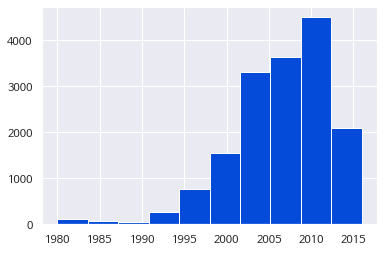

In [120]:
# 연도 분포 확인 - 비교적 최근 차료가 많음
plt.hist(df3.Year, color='#044BD9')
plt.show()

In [121]:
dfc = df3.copy()

In [122]:
# 총 출고량 컬럼 추가
dfc['Total'] = dfc['NA_Sales']+dfc['EU_Sales']+dfc['JP_Sales']+dfc['Other_Sales']
dfc 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
16384,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
16385,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
16386,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
16387,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19


In [123]:
# 총 출고량 기준 선호 장르
total_gr = dfc.groupby(['Genre'], as_index=False)['Total'].sum()
total_gr = total_gr.sort_values(['Total'], ascending=False)
total_gr

,Genre,Total
0,Action,1731.50
10,Sports,1319.42
8,Shooter,1030.30
7,Role-Playing,908.97
4,Platform,828.03
3,Misc,795.75
6,Racing,726.65
2,Fighting,444.34
9,Simulation,389.56
5,Puzzle,241.25


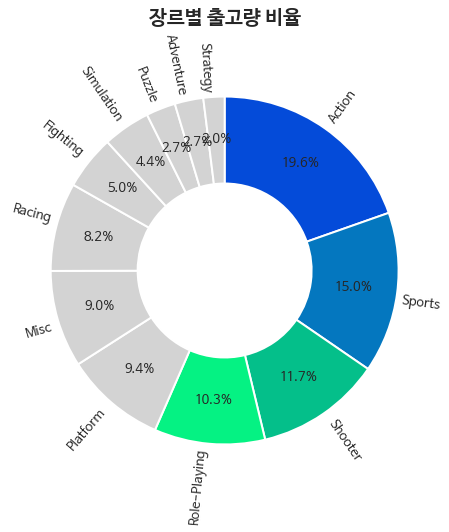

In [124]:
# 총 출고량 기준 선호장르
plt.figure(figsize=(8,8))

ratio = total_gr.Total
labels = total_gr.Genre
colors = ['#044BD9','#0477BF','#04BF8A','#05F283','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%',
        labeldistance=1.02, # 데이터 레이블과 범례 간 거리
        colors=colors,
        counterclock=False, # 시계방향으로 데이터 나열
        startangle=90, # 시작 각도 설정
        wedgeprops={'width':0.5, 'edgecolor':'w', 'linewidth':2}, # 각 파이 세부 조정, 도넛모양 설정,
        pctdistance=0.75, # 그래프 위 수치 위치 조정
        rotatelabels=True, # 레이블 회전 여부
        textprops={'size':13}) # 레이블 글자크기
plt.title('장르별 출고량 비율', fontsize=20, fontweight='bold', pad=30)
plt.show();

In [125]:
# 게임장르별 출고량 비율
fig = px.pie(total_gr, values='Total', names='Genre',
             color_discrete_sequence=px.colors.sequential.haline,
             labels={'Genre':'Total'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

- sales는 판매량 또는 매출액으로 해석 가능  
- 매출액으로 해석할 경우 고려할 변수(판매가, 부가 아이템 수입 등) 많고 유형별로 평균 판매가가 다르므로 판매량 재산출 필요  
- 본 분석에서는 sales를 판매량으로 해석(실제 vgame chart 홈페이지 내용 참조)   
- action > sports > shooter > role playing 순으로 매출액이 높음

In [126]:
# 지역별 선호 장르 
na = dfc.groupby('Genre',as_index=False)['NA_Sales'].sum().sort_values(['Genre'], ascending=True)
eu = dfc.groupby('Genre',as_index=False)['EU_Sales'].sum().sort_values(['Genre'], ascending=True)
jp = dfc.groupby('Genre',as_index=False)['JP_Sales'].sum().sort_values(['Genre'], ascending=True)
ot = dfc.groupby('Genre',as_index=False)['Other_Sales'].sum().sort_values(['Genre'], ascending=True)



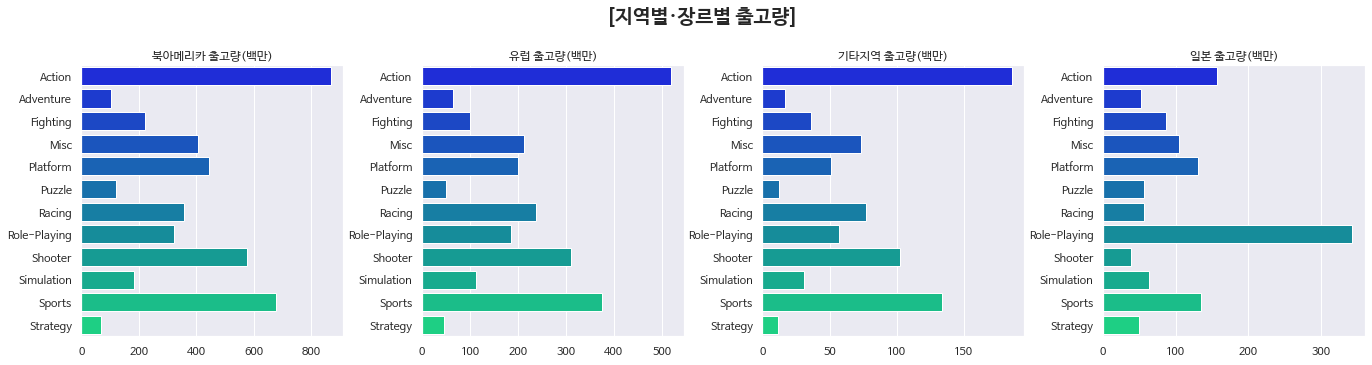

In [173]:
# 지역별 선호장르
sns.set_theme(style='whitegrid')
sns.set(font='NanumBarunGothic') # 한글폰트 설정

fig, ax = plt.subplots(1,4)
fig.set_size_inches((23,5))

ax1 = sns.barplot(x='NA_Sales', y='Genre', data=na, orient='h', palette='winter', ax=ax[0])
ax1.set(xlabel=None, ylabel=None, title='북아메리카 출고량(백만)')


ax2 = sns.barplot(x='EU_Sales', y='Genre', data=eu, orient='h', palette='winter', ax=ax[1])
ax2.set(xlabel=None, ylabel=None, title='유럽 출고량(백만)')

ax3 = sns.barplot(x='Other_Sales', y='Genre', data=ot, orient='h', palette='winter', ax=ax[2])
ax3.set(xlabel=None, ylabel=None, title='기타지역 출고량(백만)')

ax4 = sns.barplot(x='JP_Sales', y='Genre', data=jp, orient='h', palette='winter', ax=ax[3])
ax4.set(xlabel=None, ylabel=None, title='일본 출고량(백만)')

plt.suptitle('[지역별·장르별 출고량]', size=20, weight='bold', y=1.04) # 전체 제목
plt.subplots_adjust(wspace=0.3, hspace=0.3) # plot들이 겹치지 않게 자동조정
plt.show()

- 북아메리카, 유럽, 기타지역의 선호장르는 유사
- 일본이 특이. 롤플레잉 가장 선호

In [203]:
# 시장 간 상관관계
dfc_cor = dfc[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
dfc_cor.columns= ['북미', '유럽', '일본', '기타지역']

,북미,유럽,일본,기타지역
0,0.15,0.10,0.12,0.03
1,0.00,0.00,0.17,0.00
2,0.11,0.09,0.00,0.03
3,0.00,0.00,0.16,0.00
4,0.00,0.00,0.17,0.00
...,...,...,...,...
16384,0.01,0.00,0.00,0.00
16385,1.67,0.58,0.00,0.20
16386,0.01,0.01,0.00,0.00
16387,0.08,0.09,0.00,0.02


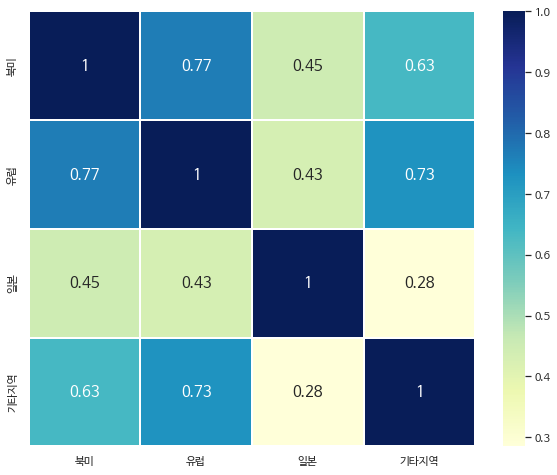

In [208]:
# 지역 간 상관관계
plt.figure(figsize = (10,8))
sns.set(font='NanumBarunGothic')
sns.heatmap(dfc_cor.corr(), annot=True, annot_kws={'size':15}, cmap='YlGnBu', linewidth=0.3)
plt.show()

- 북미-유럽은 0.77로 비교적 높은 양의 상관관계   
- 북미-일본은 0.45로 비교적 낮은 양의 상관관계
- 북미-기타는 0.63, 양의 상관관계   

일본이 상대적으로 다른 시장과의 상관도가 낮음

지역별 선호장르 차이에 대한 가설검정   
- 귀무가설 : 지역별로 선호하는 게임장르는 차이가 없다.  
- 대립가설 : 지별별로 선호하는 게임장르는 차이가 있다.

In [129]:
chi_gr = dfc.groupby('Genre').sum()
chi_gr = chi_gr.drop(['Year'], axis=1, inplace=False)
chi_gr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Genre,,,,,
Action,868.87,520.05,156.66,185.92,1731.50
Adventure,102.03,63.73,51.89,16.71,234.36
Fighting,220.95,100.05,87.14,36.20,444.34
Misc,404.96,211.85,105.20,73.74,795.75
Platform,445.38,200.67,130.53,51.45,828.03
Puzzle,122.03,50.50,56.24,12.48,241.25
Racing,356.27,236.90,56.34,77.14,726.65
Role-Playing,323.33,185.25,343.10,57.29,908.97
Shooter,578.18,311.65,38.21,102.26,1030.30


In [130]:
# 카이제곱 검정(동질성 검정)
# 범주형 변수의 가설검정에 사용
# 관찰빈도와 기대빈도 간 차이를 카이제곱 분포를 참조해 통계적으로 검증

chi2, p, dof, expected = chi2_contingency(chi_gr)
p

4.345667452555518e-116

- p값이 0.05보다 작으므로 귀무가설 기각   
- 지역별로 선호하는 게임 장르는 차이가 있다.(지역에 따라 선호하는 게임은 다르다.)

In [131]:
ygt=dfc.groupby(['Year','Genre'],as_index=True)['Total'].sum().reset_index()
ygt

,Year,Genre,Total
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
381,2016,Role-Playing,6.75
382,2016,Shooter,18.17
383,2016,Simulation,0.39
384,2016,Sports,14.63


In [132]:
# 연도별 최대 출고된 장르 찾기
ygt = ygt.sort_values(by=['Year','Total'], ascending=[True,False]) 
ygt


,Year,Genre,Total
3,1980,Shooter,7.07
2,1980,Misc,2.70
1,1980,Fighting,0.77
0,1980,Action,0.34
4,1981,Action,14.79
...,...,...,...
376,2016,Adventure,1.93
380,2016,Racing,1.67
378,2016,Misc,1.15
385,2016,Strategy,0.52


In [133]:
ygt_max = ygt.drop_duplicates(subset='Year', keep='first', inplace=False).reset_index(drop=True)
ygt_max.head()

,Year,Genre,Total
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10


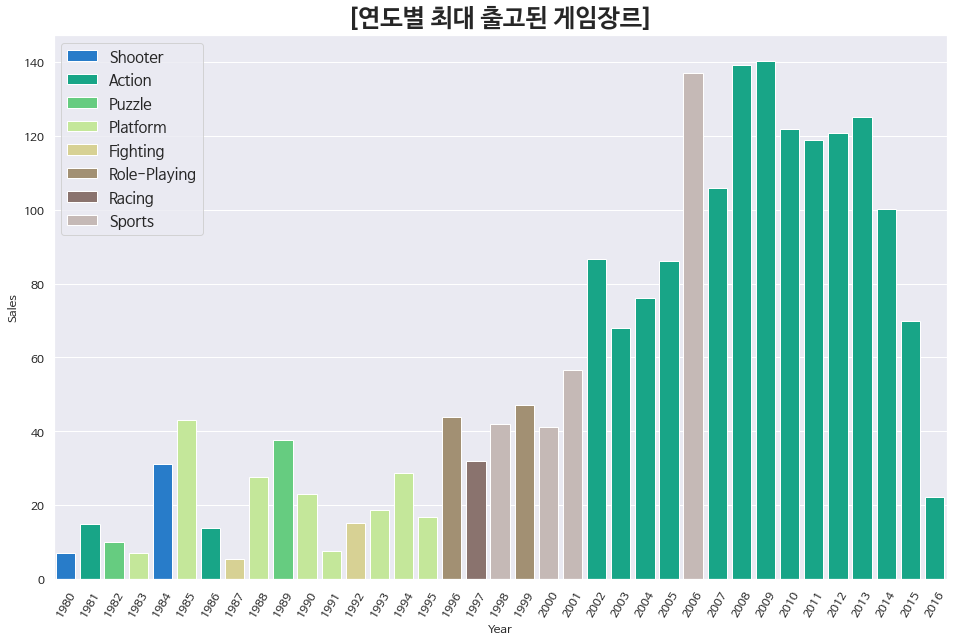

In [134]:

sns.set_style('whitegrid');
sns.set(font='NanumBarunGothic')

plt.figure(figsize=(16,10))

# 연도별 게임시장 규모 추이(총 출고량 추이)
sns.barplot(x='Year', y='Total', data=ygt_max, hue='Genre', palette='terrain', dodge=False)
plt.title('[연도별 최대 출고된 게임장르]', size=25, weight='bold', pad=10)
plt.legend(fontsize=15)
plt.xticks(rotation=60, size=12)
plt.yticks(size=12)
plt.xlabel('Year', size=12)
plt.ylabel('Sales', size=12)
plt.show();

- 2001년까지는 출고량이 높은 장르가 일정하지 않음
- 그러나 2012년부터는 2006년을 제외하고 action 장르가 가장 높은 출고량을 유지
- 2006년에는 sports가 인기. 무슨 일?

In [135]:
yr_total = dfc.groupby('Year',as_index=False)['Total'].sum()
yr_total.head()

,Year,Total
0,1980,10.88
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.71


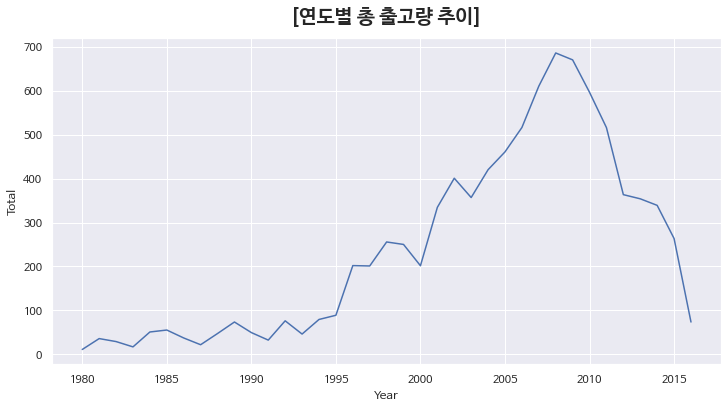

In [136]:
sns.set_style('whitegrid');
sns.set(font='NanumBarunGothic')
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Total', data=yr_total)
plt.title('[연도별 총 출고량 추이]', size=20, weight='bold', pad=15)
plt.show();


※ 비디오게임의 성장률 급감 이유(2009~2011년 게임백서, 한국콘텐츠진흥원)
- 차세대 콘솔게임의 성장세 둔화, 기존 시장을 주도한 일부 콘솔게임기의 소프트웨어 판매랑 급감 
- 경기침체(2008년 세계 금융위기)와 콘솔게임의 수명주기 → 수요 위축
- 저가형 모델 출시, 모션 컨트롤러 출시 위주(소극적 출시)
- 차세대 콘솔 출시 이후 해소될 것으로 전망
- 그 이후에는 온라인게임과 모바일게임의 점유율 증가로 성장세 둔화


In [175]:
yr_total[yr_total['Year']>2005]

,Year,Total
26,2006,516.42
27,2007,610.62
28,2008,686.20
29,2009,670.48
30,2010,596.64
31,2011,516.21
32,2012,363.50
33,2013,354.03
34,2014,339.10
35,2015,263.57


In [137]:
ypt = dfc.groupby(['Year','Platform'],as_index=True)['Total'].sum().reset_index()



In [138]:
# 연도별 최대 출고된 플랫폼 찾기
ypt = ypt.sort_values(by=['Year','Total'], ascending=[True,False]) 

In [139]:
ypt_max = ypt.drop_duplicates(subset='Year', keep='first', inplace=False).reset_index(drop=True)
ypt_max.head()

,Year,Platform,Total
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,NES,10.96
4,1984,NES,50.08


c:\Users\MSI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



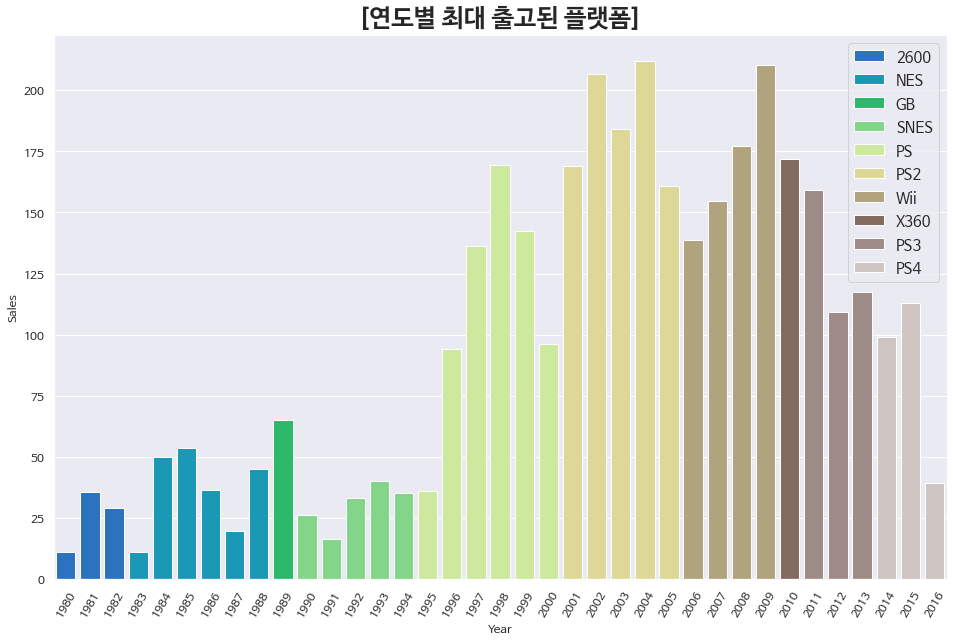

In [140]:

sns.set_style('whitegrid');
sns.set(font='NanumBarunGothic')

plt.figure(figsize=(16,10))

# 연도별 게임시장 규모 추이(총 출고량 추이)
sns.barplot(x='Year', y='Total', data=ypt_max, hue='Platform', palette='terrain', dodge=False)
plt.title('[연도별 최대 출고된 플랫폼]', size=25, weight='bold', pad=10)
plt.legend(fontsize=15)
plt.xticks(rotation=60, size=12)
plt.yticks(size=12)
plt.xlabel('Year', size=12)
plt.ylabel('Sales', size=12)
plt.show();

In [141]:
# 지역별 선호 플랫폼
# 플랫폼 수명주기(10년) 고려하여 2006년 이후 데이터로 분석
after6 = dfc[dfc.Year>=2006]

In [142]:
plat = after6.groupby('Platform', as_index=False).sum().sort_values('Total', ascending=False)
plat


,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
14,X360,2470225,590.73,279.03,12.04,84.50,966.30
8,PS3,2626135,389.03,340.74,78.60,140.89,949.26
12,Wii,2597604,500.61,263.22,65.81,79.28,908.92
2,DS,4002846,332.07,148.42,141.44,48.09,670.02
9,PS4,673010,95.80,122.94,14.01,43.00,275.75
7,PS2,1623939,114.38,49.21,33.77,67.09,264.45
10,PSP,2185925,81.84,56.13,70.82,34.26,243.05
0,3DS,1010549,73.14,54.26,92.98,11.78,232.16
6,PC,1540032,43.50,98.06,0.00,20.94,162.50
16,XOne,429150,83.19,45.65,0.34,11.92,141.10


In [143]:
plat_na_rank = plat['NA_Sales'].rank(ascending=False).astype(int)
plat['na_rank'] = plat_na_rank
plat_eu_rank = plat['EU_Sales'].rank(ascending=False).astype(int)
plat['eu_rank'] = plat_eu_rank
plat_jp_rank = plat['JP_Sales'].rank(ascending=False).astype(int)
plat['jp_rank'] = plat_jp_rank
plat_ot_rank = plat['Other_Sales'].rank(ascending=False).astype(int)
plat['ot_rank'] = plat_ot_rank

plat

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,na_rank,eu_rank,jp_rank,ot_rank
14,X360,2470225,590.73,279.03,12.04,84.50,966.30,1,2,10,2
8,PS3,2626135,389.03,340.74,78.60,140.89,949.26,3,1,3,1
12,Wii,2597604,500.61,263.22,65.81,79.28,908.92,2,3,5,3
2,DS,4002846,332.07,148.42,141.44,48.09,670.02,4,4,1,5
9,PS4,673010,95.80,122.94,14.01,43.00,275.75,6,5,8,6
7,PS2,1623939,114.38,49.21,33.77,67.09,264.45,5,9,6,4
10,PSP,2185925,81.84,56.13,70.82,34.26,243.05,8,7,4,7
0,3DS,1010549,73.14,54.26,92.98,11.78,232.16,9,8,2,10
6,PC,1540032,43.50,98.06,0.00,20.94,162.50,10,6,16,8
16,XOne,429150,83.19,45.65,0.34,11.92,141.10,7,10,12,9


In [144]:
# 출고량 높은 게임 분석
# 최근 5년(2012년~2016년) 기준 출고량 top 50 대상

yr5 = dfc[dfc.Year>=2012].sort_values(by='Total', ascending=False).head(50)
yr5 = yr5.reset_index(drop=True)
yr5.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [145]:
# top 50 장르별 판매량
top50_gr = yr5.groupby('Genre', as_index=False)['Total'].sum()
top50_gr = top50_gr.sort_values(by='Total', ascending=False)
top50_gr



,Genre,Total
6,Shooter,126.70
0,Action,99.63
8,Sports,35.91
5,Role-Playing,31.83
2,Misc,25.98
3,Platform,19.27
7,Simulation,14.25
1,Fighting,12.46
4,Racing,6.96


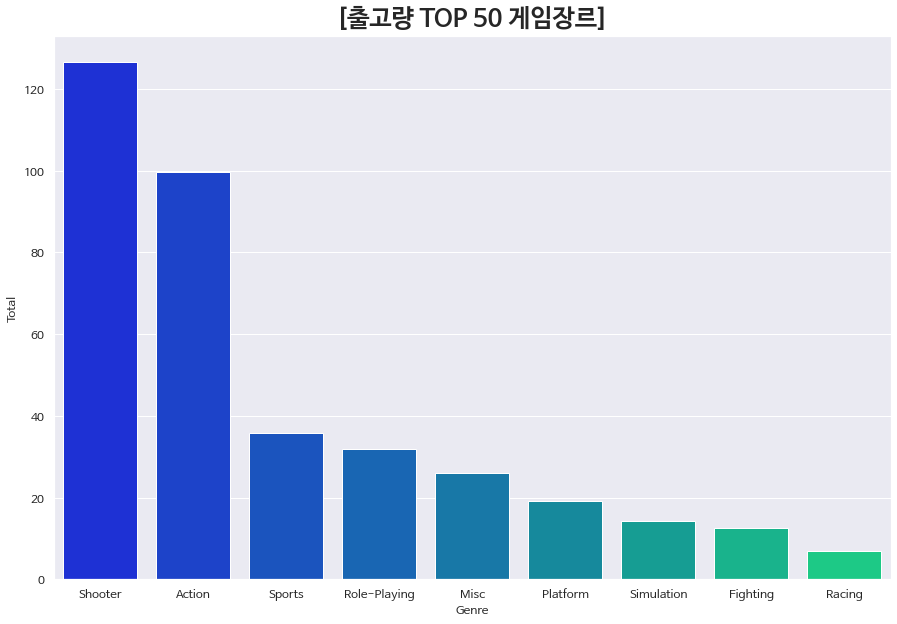

In [146]:

sns.set_style('whitegrid');
sns.set(font='NanumBarunGothic')

plt.figure(figsize=(15,10))

sns.barplot(x='Genre', y='Total', data=top50_gr, palette='winter', dodge=False)
plt.title('[출고량 TOP 50 게임장르]', size=25, weight='bold', pad=10)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [147]:
# top 50 플랫폼별 판매량
top50_pl = yr5.groupby('Platform', as_index=False)['Total'].sum()
top50_pl = top50_pl.sort_values(by='Total', ascending=False)
top50_pl

,Platform,Total
3,PS3,87.32
4,PS4,87.21
7,X360,78.39
0,3DS,47.42
6,WiiU,30.44
8,XOne,21.76
1,DS,8.34
5,Wii,6.91
2,PC,5.20


In [148]:
fig = px.pie(top50_pl, values='Total', names='Platform',
             color_discrete_sequence=px.colors.sequential.haline,
             title='출고량 Top 50 게임 플랫폼',
             labels={'Genre':'Total'})
fig.update_traces(textposition='inside', textinfo='percent+label')      
fig.show()

- ps3, ps4, x360 위주
- 콘솔게임기가 압도적

In [149]:
# top 50 게임
top50_nm = yr5.groupby('Name', as_index=False)['Total'].sum()
top50_nm = top50_nm.sort_values(by='Total', ascending=False).reset_index(drop=True)
top50_nm.head(20)

,Name,Total
0,Grand Theft Auto V,54.84
1,Call of Duty: Black Ops II,27.78
2,Call of Duty: Black Ops 3,21.53
3,Call of Duty: Advanced Warfare,21.48
4,Call of Duty: Ghosts,19.79
5,Minecraft,14.62
6,FIFA Soccer 13,13.42
7,Super Smash Bros. for Wii U and 3DS,12.46
8,Assassin's Creed III,11.81
9,FIFA 15,11.42


- 시리즈물이 강세. 기존 이용자 유입효과가 있는듯

In [150]:
# top 50 지역별 판매량
top50_gr = yr5.groupby('Genre', as_index=False)['Total'].sum()
top50_gr = top50_gr.sort_values(by='Total', ascending=False)
top50_gr

,Genre,Total
6,Shooter,126.70
0,Action,99.63
8,Sports,35.91
5,Role-Playing,31.83
2,Misc,25.98
3,Platform,19.27
7,Simulation,14.25
1,Fighting,12.46
4,Racing,6.96


In [151]:
yr5.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74


In [152]:
yr5_m = yr5.melt(id_vars='Name', value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                 var_name='region', value_name='sales')
yr5_m

,Name,region,sales
0,Grand Theft Auto V,NA_Sales,7.01
1,Grand Theft Auto V,NA_Sales,9.63
2,Call of Duty: Black Ops 3,NA_Sales,5.77
3,Call of Duty: Black Ops II,NA_Sales,4.99
4,Call of Duty: Black Ops II,NA_Sales,8.25
...,...,...,...
195,FIFA 14,Other_Sales,0.46
196,Call of Duty: Advanced Warfare,Other_Sales,0.37
197,Halo 5: Guardians,Other_Sales,0.39
198,Super Mario 3D World,Other_Sales,0.30


In [153]:
top50_re = yr5_m.groupby('region', as_index=False)['sales'].sum()
top50_re = top50_re.sort_values(by='sales', ascending=False).reset_index(drop=True)
top50_re.region = ['North America', 'Europe', 'Japan', 'Others']
top50_re

,region,sales
0,North America,151.87
1,Europe,144.92
2,Japan,46.59
3,Others,29.61


In [154]:
fig = px.pie(top50_re, values='sales', names='region',
             color_discrete_sequence=px.colors.sequential.haline,
             title='Top 30 게임 지역별 출고량 비율',
             labels={'Genre':'Total'})
fig.update_traces(textposition='inside', textinfo='percent+label')      
fig.show()

북아메리카와 유럽의 시장규모가 큼

출고량 top50 분석결과
- 게임장르 : shooting, action
- 플랫폼 : PS3, PS4(콘솔)
- 게임유형 : 시리즈물
- 지역 : 미국, 유럽

In [155]:
top50_pb = yr5.groupby('Publisher', as_index=False)['Total'].sum()
top50_pb

,Publisher,Total
0,Activision,101.44
1,Bethesda Softworks,6.96
2,Electronic Arts,57.00
3,Microsoft Game Studios,23.22
4,Nintendo,86.20
5,Sony Computer Entertainment,18.63
6,Sony Computer Entertainment Europe,5.98
7,Take-Two Interactive,54.84
8,Ubisoft,18.72


In [156]:
yr5.Publisher.value_counts()

Nintendo                              13
Activision                            12
Electronic Arts                        9
Take-Two Interactive                   4
Sony Computer Entertainment            4
Microsoft Game Studios                 3
Ubisoft                                3
Bethesda Softworks                     1
Sony Computer Entertainment Europe     1
Name: Publisher, dtype: int64